In [1]:
import numpy as np 
from mpl_toolkits import mplot3d 
from matplotlib import cm 
import matplotlib.pyplot as plt 
from scipy.optimize import minimize 
from scipy.stats import norm 
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF 
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct

In [2]:
def func (x1 , x2): 
    return 0.5 * np.exp(-0.5 * (( x1 + 1.25)**2 + (x2 + 1.75)**2)) + np.exp(-0.5 * (( x1 - 2.25)**2 + (x2 - 2.65)**2))

In [3]:
def noisy_func(x1 , x2): 
    output = func(x1 , x2) 
    noise = np.random.normal(0,0.1,np.shape(output)) 
    return output + noise

In [4]:
def probability_of_improvement(mu,sigma,opt_val):
    gamma = (mu - opt_val)/sigma
    return norm.cdf(gamma)
    
def expected_improvement(mu,sigma,opt_val):
    gamma = (mu - opt_val)/sigma
    return sigma * gamma * norm.cdf(gamma) + sigma * norm.pdf(gamma)

def upper_confidence_bound(mu,sigma,k):
    return mu + k * sigma

In [10]:
def my_acquisition_function(mu, sigma, k):
#     return expected_improvement(mu,sigma,opt_val=1)
    return upper_confidence_bound(mu,sigma,k)

def query(opt_val,gp):
    def obj(x):
        #gaussian process prediction
        mu_x,sigma_x = gp.predict(x.reshape(1,-1),return_std=True)
        
        return -my_acquisition_function(mu_x,sigma_x,opt_val)
    
    x0 = np.random.uniform(-5,5,2)
    res = minimize(obj, x0=x0.reshape(1,-1), bounds=([-5, 5], [-5, 5]))
    return res.x

In [11]:
#visulize cost function
res = 50 
lin = np.linspace(-5, 5 , res ) 
meshX, meshY = np. meshgrid( lin , lin )
meshpts = np.vstack((meshX.flatten( ) , meshY. flatten( ))).T


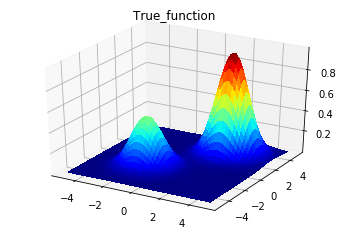

<Figure size 576x288 with 0 Axes>

In [12]:
def add_subplot(gp , subplt ): 
    mu = gp.predict(meshpts , return_std=False ) 
    ax = fig.add_subplot(2 , 5 , subplt , projection='3d' ) 
    ax.plot_surface(meshX, meshY, np.reshape(mu, (50 , 50)) , rstride =1, cstride =1, cmap=cm.jet , linewidth=0, antialiased=False )
if __name__== '__main__': 
    true_y = func(meshX, meshY)
    
    fig = plt.figure () 
    ax = fig.add_subplot(111 , projection='3d' ) 
    ax.plot_surface(meshX, meshY, true_y , rstride =1, cstride =1, cmap=cm.jet , linewidth=0, antialiased=False ) 
    plt.title( 'True_function' ) 
    plt.show()
    
    fig = plt.figure( figsize=plt.figaspect(0.5))


In [13]:
xi_ = np.random.uniform(-5,5,(4,2))
yi_ = noisy_func(xi_[:,0], xi_[:,1])

Best value:  0.48426703157732276
at  [[3.71967572 3.0609815 ]]
Best value:  0.48426703157732276
at  [[3.71967572 3.0609815 ]]
Best value:  0.48426703157732276
at  [[3.71967572 3.0609815 ]]
Best value:  0.8523813847774165
at  [[1.91467174 3.1265312 ]]
Best value:  0.8523813847774165
at  [[1.91467174 3.1265312 ]]
Best value:  0.8523813847774165
at  [[1.91467174 3.1265312 ]]
Best value:  0.8523813847774165
at  [[1.91467174 3.1265312 ]]
Best value:  0.8523813847774165
at  [[1.91467174 3.1265312 ]]
Best value:  0.8523813847774165
at  [[1.91467174 3.1265312 ]]
Best value:  0.8523813847774165
at  [[1.91467174 3.1265312 ]]


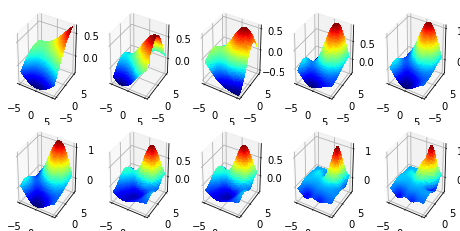

(0.8523813847774165, array([[1.91467174, 3.1265312 ]]))

In [14]:
xi = xi_[:]
yi = yi_[:]

gp = GPR(kernel=RBF(length_scale=1.0) , n_restarts_optimizer=10)   

fig=plt.figure(figsize=plt.figaspect(0.5))

for i in range(10):
    gp.fit(xi,yi)

    #find the current optimal value and its location
    opt_val = max(yi)
    opt_x = xi[np.where(yi == opt_val)]

    print('Best value: ', opt_val)
    print('at ', opt_x)

    next_x = query(opt_val, gp)
    
    # add next_x to the list of data points    
    xi = np.append(xi, [next_x],axis=0)

    next_y = noisy_func(xi[-1][0], xi[-1][1]).reshape(1)

    # add next_y to the list of observations
    yi = np.append(yi,next_y)

    add_subplot(gp, i+1)

plt.show()
opt_val, opt_x

In [15]:
current_max = 0
x1, x2 = 0, 0
for x_1 in np.linspace(-10,10, 500):
    for x_2 in np.linspace(-10,10, 500):
        y = func(x_1, x_2)
        if y > current_max:
            current_max = y
            x1 , x2 = x_1, x_2
            
print(f"Global Optimum: {current_max}")
print(f"Corresponding x1, x2: {x1, x2}")

Global Optimum: 0.999777024262348
Corresponding x1, x2: (2.2645290581162314, 2.6653306613226455)


We are